In [2]:
#collab notebook https://colab.research.google.com/drive/1zvA9e6rbFpVYKaVdgZUw6vqTJAJMc7D2?usp=sharing
!pip install anvil-uplink
!pip install gpt_2_simple
!pip install diffusers
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=c1a27b11a1ee3b8fb0543516b1ec64fe1edb7d47373e64d0bc775778d8d83c28
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


  Preparing metadata (setup.py) ... done
  Created wheel for gpt_2_simple: filename=gpt_2_simple-0.8.1-py3-none-any.whl size=24557 sha256=be82de952c83503fab3460cc5f54ae8b5f099113adeab0c3521253c0a85935d5
  Stored in directory: /root/.cache/pip/wheels/df/6a/fe/10d3223f78d1ac3e4c83bb4c5e2d28dfb1789c2fb4cc7ea8d0
Successfully built gpt_2_simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingfa

In [3]:
import anvil.server
from PIL import Image, ImageFont, ImageDraw
import gpt_2_simple as gpt2
import re
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch
import io
from google.colab import drive
drive.mount('/content/drive')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Mounted at /content/drive


In [4]:
anvil.server.connect("server_AMNZBOEFGO2XLPCTZNG6QWP7-EAF24YBCD2GCHB3P")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [28]:
#gpt 2 stuff with models
import tensorflow as tf
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, model_dir = '/content/drive/MyDrive/fine-tuning', checkpoint_dir= '/content/drive/MyDrive/fine-tuning',  run_name = 'run_creatures', reuse = True) # remember to turn off reuse on first run
@anvil.server.callable
def make_artifact(prompt):
  sess = gpt2.start_tf_sess()
  gpt2.load_gpt2(sess, model_dir = '/content/drive/MyDrive/fine-tuning', checkpoint_dir= '/content/drive/MyDrive/fine-tuning',  run_name = 'run_creatures')
  gpt2.load_gpt2(sess, model_dir = '/content/drive/MyDrive/fine-tuning', checkpoint_dir= '/content/drive/MyDrive/fine-tuning',  run_name = 'run_artifacts', reuse = True)
  return gpt2.generate (sess, temperature=.5, prefix= prompt, length=45, top_k=10, nsamples=1, run_name= 'run_artifacts', model_dir= '/content/drive/MyDrive/fine-tuning', checkpoint_dir = '/content/drive/MyDrive/fine-tuning', return_as_list=True)[0]
@anvil.server.callable
def make_creature(prompt):
  sess = gpt2.start_tf_sess()
  gpt2.load_gpt2(sess, model_dir = '/content/drive/MyDrive/fine-tuning', checkpoint_dir= '/content/drive/MyDrive/fine-tuning',  run_name = 'run_creatures')
  gpt2.load_gpt2(sess, model_dir = '/content/drive/MyDrive/fine-tuning', checkpoint_dir= '/content/drive/MyDrive/fine-tuning',  run_name = 'run_creatures', reuse = True)
  return gpt2.generate (sess, temperature=.5, prefix= prompt, length=45, top_k=10, nsamples=1, run_name= 'run_creatures', model_dir= '/content/drive/MyDrive/fine-tuning', checkpoint_dir = '/content/drive/MyDrive/fine-tuning', return_as_list=True)[0]
@anvil.server.callable
def make_enchantment(prompt):
  sess = gpt2.start_tf_sess()
  gpt2.load_gpt2(sess, model_dir = '/content/drive/MyDrive/fine-tuning', checkpoint_dir= '/content/drive/MyDrive/fine-tuning',  run_name = 'run_creatures')
  gpt2.load_gpt2(sess, model_dir = '/content/drive/MyDrive/fine-tuning', checkpoint_dir= '/content/drive/MyDrive/fine-tuning',  run_name = 'run_enchantments', reuse = True)
  return gpt2.generate (sess, temperature=.5, prefix= prompt, length=45, top_k=10, nsamples=1, run_name= 'run_enchantments', model_dir= '/content/drive/MyDrive/fine-tuning', checkpoint_dir = '/content/drive/MyDrive/fine-tuning', return_as_list=True)[0]
@anvil.server.callable
def make_land(prompt):
  sess = gpt2.start_tf_sess()
  gpt2.load_gpt2(sess, model_dir = '/content/drive/MyDrive/fine-tuning', checkpoint_dir= '/content/drive/MyDrive/fine-tuning',  run_name = 'run_creatures')
  gpt2.load_gpt2(sess, model_dir = '/content/drive/MyDrive/fine-tuning', checkpoint_dir= '/content/drive/MyDrive/fine-tuning',  run_name = 'run_lands', reuse = True)
  return gpt2.generate (sess, temperature=.5, prefix= prompt, length=45, top_k=10, nsamples=1, run_name= 'run_lands', model_dir= '/content/drive/MyDrive/fine-tuning', checkpoint_dir = '/content/drive/MyDrive/fine-tuning', return_as_list=True)[0]
@anvil.server.callable
def make_spell(prompt):
  sess = gpt2.start_tf_sess()
  gpt2.load_gpt2(sess, model_dir = '/content/drive/MyDrive/fine-tuning', checkpoint_dir= '/content/drive/MyDrive/fine-tuning',  run_name = 'run_creatures')
  gpt2.load_gpt2(sess, model_dir = '/content/drive/MyDrive/fine-tuning', checkpoint_dir= '/content/drive/MyDrive/fine-tuning',  run_name = 'run_spells', reuse = True)
  return gpt2.generate (sess, temperature=.5, prefix= prompt, length=45, top_k=10, nsamples=1, run_name= 'run_spells', model_dir= '/content/drive/MyDrive/fine-tuning', checkpoint_dir = '/content/drive/MyDrive/fine-tuning', return_as_list=True)[0]


Loading checkpoint /content/drive/MyDrive/fine-tuning/run_creatures/model-100


In [26]:
@anvil.server.callable
def start_session():
  sess = gpt2.start_tf_sess()
  gpt2.load_gpt2(sess, model_dir = '/content/drive/MyDrive/fine-tuning', checkpoint_dir= '/content/drive/MyDrive/fine-tuning',  run_name = 'run_creatures')


In [6]:
#stable AI generator
model_id = "stabilityai/stable-diffusion-2"
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [38]:
#make card_image
@anvil.server.callable
def card_image(color, card_name, cardtext, type, power, toughness, subtype = '', iscreature = False):
    ai_image = pipe(card_name).images[0]
    if iscreature == True:
        im = Image.open(f"/content/drive/MyDrive/fine-tuning/{color}creature.png")
        title = ImageDraw.Draw(im)
        beleren = ImageFont.truetype(font = '/content/drive/MyDrive/fine-tuning/Beleren2016-Bold.ttf', size = 35)
        #adding cardname
        title.text((48, 48), f'{card_name}', (0,0,0), font=beleren)
        #making rules text
        title.text((68, 525), f'{cardtext}', (0,0,0), font = ImageFont.truetype(font = '/content/drive/MyDrive/fine-tuning/Beleren2016-Bold.ttf', size= 20))
        #adding P/T
        title.text((457,717), f'{power}/{toughness}', (0,0,0),font = beleren )
        #adding type/subtype
        title.text((42,458), f'{type} - {subtype}', (0,0,0), font = beleren)
        #adding ai image
        ai_image = ai_image.resize((469, 348))
        im.paste(ai_image, (50,93))
        return img_to_media_obj(im)
    else:
        im = Image.open(f"/content/drive/MyDrive/fine-tuning/{color}.png")
        title = ImageDraw.Draw(im)
        beleren = ImageFont.truetype(font ='/content/drive/MyDrive/fine-tuning/Beleren2016-bold.ttf', size = 35)
        #adding cardname
        title.text((48, 48), f'{card_name}', (0,0,0), font=beleren)
        #making rules text
        title.text((68, 525), f'{cardtext}', (0,0,0), font = ImageFont.truetype(font = '/content/drive/MyDrive/fine-tuning/Beleren2016-Bold.ttf', size= 20))
        #no P/T for non creatures
        #adding type/subtype
        title.text((50,458), f'{type} - {subtype}', (0,0,0), font = beleren)
        #adding ai image
        ai_image = ai_image.resize((469, 348))
        im.paste(ai_image, (50,93))
        return img_to_media_obj(im)

In [34]:
@anvil.server.callable
def img_to_media_obj(img): #https://anvil.works/forum/t/cannot-serialize-class-pil-image-image-object/8065/3
  img_byte_arr = io.BytesIO()
  img.save(img_byte_arr, format='PNG')
  img_byte_arr = img_byte_arr.getvalue()
  media_obj = anvil.BlobMedia(content_type="image/png", content=img_byte_arr)
  return media_obj

In [9]:
@anvil.server.callable
def make_image(prompt, name, type, subtype, ):
  return img_to_media_obj((pipe(prompt).images[0]))

In [37]:
@anvil.server.callable
def split_lines(string):
  return string.split('\n')[0]

In [11]:
@anvil.server.callable
def new_lines(cutstring):
    return re.sub("(.{40})", "\\1\n", cutstring, 0, re.DOTALL)

Loading checkpoint /content/drive/MyDrive/fine-tuning/run_creatures/model-100


  0%|          | 0/50 [00:00<?, ?it/s]

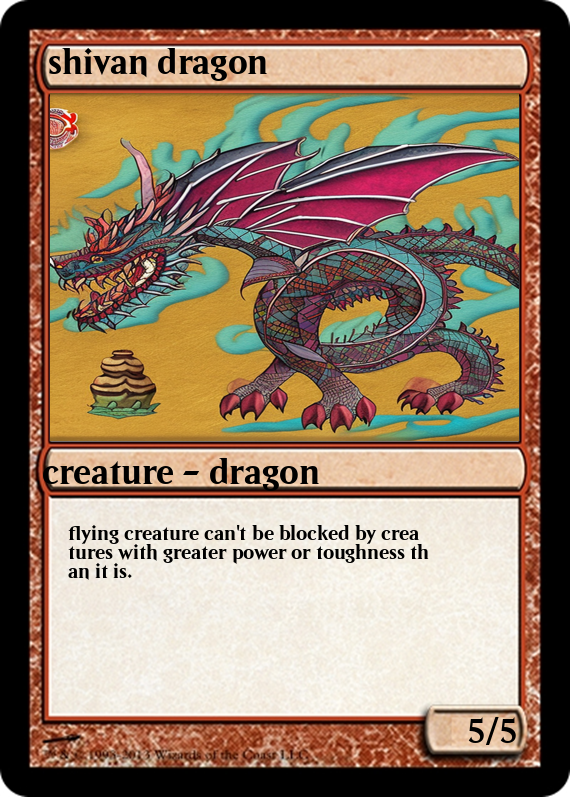

In [8]:
card_name = 'shivan dragon'
card_image(color = 'red', card_name = card_name, cardtext = new_lines(make_creature('flying').split('\n')[0]), type = 'creature',
           ai_image = make_image(card_name), subtype = 'dragon', power = 5, toughness = 5, iscreature = True)